In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path, encoding="utf-8")
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results_df = pd.read_csv(study_results_path, encoding="utf-8")
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
# Use merge function for each df.
mouse_data_df = pd.merge(mouse_metadata_df, study_results_df)
mouse_data_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [4]:
# Checking the number of mice.
mouse_data_df["Mouse ID"].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_id_data_df = mouse_data_df['Mouse ID'].value_counts()
mouse_id_data_df.head()

g989    13
k403    10
j365    10
j984    10
k210    10
Name: Mouse ID, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_tp_data_df = mouse_data_df['Timepoint'].value_counts()
mouse_tp_data_df.head()

0     250
5     238
10    223
15    207
20    195
Name: Timepoint, dtype: int64

In [25]:
drug_regimen = mouse_data_df['Drug Regimen'].value_counts()
drug_regimen

# print(len(drug_regimen))

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID.

In [65]:
mouse_data_df.drop_duplicates(subset='Mouse ID', inplace=False, ignore_index=False)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


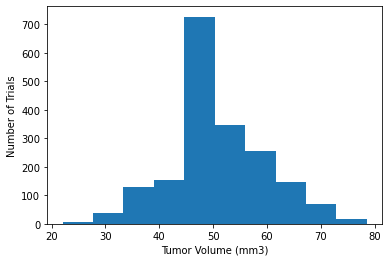

50.448380631336505
48.95147442
0    45.0
dtype: float64


In [55]:
# SUMMARY STATISTICS:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
plt.hist(mouse_data_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Number of Trials')
plt.show()
print(mouse_data_df['Tumor Volume (mm3)'].mean())
print(mouse_data_df['Tumor Volume (mm3)'].median())
print(mouse_data_df['Tumor Volume (mm3)'].mode())

In [64]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_table = mouse_data_df.groupby(['Drug Regimen', 'Tumor Volume (mm3)'])

sum_it_up = summary_table.sum()
sum_it_up.head()
# mice_avg_weight = mouse_data_df['Tumor Volume (3mm)'].mean()
# Assemble the resulting series into a single summary dataframe.

Age_months  Weight (g)  Timepoint  \
Drug Regimen Tumor Volume (mm3)                                      
Capomulin    23.343598                    3          17         45   
             25.472143                    3          17         40   
             28.167397                   16          15         40   
             28.328531                    3          17         35   
             28.430964                   22          17         45   

                                 Metastatic Sites  
Drug Regimen Tumor Volume (mm3)                    
Capomulin    23.343598                          1  
             25.472143                          1  
             28.167397                          0  
             28.328531                          1  
             28.430964                          1

In [ ]:
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = sts.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [67]:
# BAR AND PIE CHARTS:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


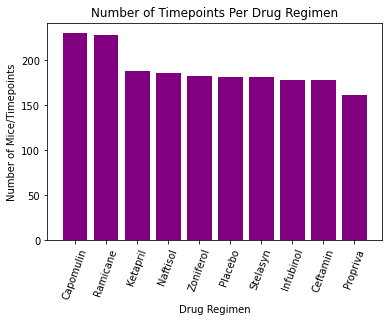

<Figure size 432x288 with 0 Axes>

In [68]:
mouse_ids = [250, 238, 223, 207, 195]
timepoint_series = [0, 5, 10, 15, 20]
x_axis = np.arange(len(drug_regimen))
x_axis

plt.bar(x_axis, drug_regimen, color='purple', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice/Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"], rotation = 70)
# plt.xlim(-0.5, 4.5)
# plt.ylim(0, 1.10*max(clean_mouse_data_df))
plt.title("Number of Timepoints Per Drug Regimen")
plt.savefig("time_v_regimen_bar_mpl.svg")

plt.show()
plt.tight_layout()

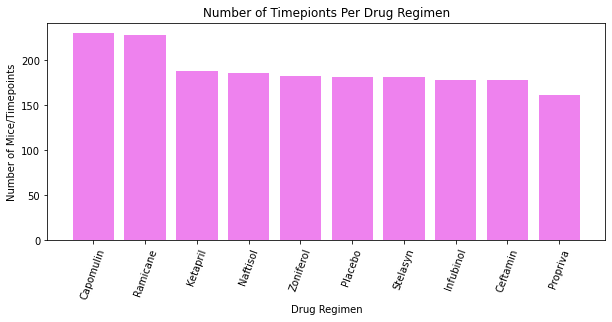

<Figure size 432x288 with 0 Axes>

In [69]:
plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_regimen, color='violet', align="center")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"], rotation = 70)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice/Timepoints")
plt.title("Number of Timepionts Per Drug Regimen")
plt.savefig("time_v_regimen_bar_pandas.svg")
plt.show()
plt.tight_layout()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.style.use('ggplot')

mouse_id_data_df = mouse_data_df['Sex'].value_counts()
mouse_id_data_df.head()

# plt.xticks(x_axis,
colors = ["purple", "gray"]
explode = (0.1, 0)
plt.pie(mouse_id_data_df, explode=explode, labels="Male","Female", colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=70)
plt.axis("equal") 
plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (3208250721.py, line 11)

In [72]:
# How do you display the male and female labels in the graph?
labels = ["Male", "Female"]
male_v_female = [958, 935]
# fig = plt.figure(linewidth=10, edgecolor="#DFFF00")

# Create axes which are equal so we have a perfect circle
plt.savefig("pie.svg")

<Figure size 432x288 with 0 Axes>

In [ ]:
# QUARTILES, OUTLIERS AND BOXPLOTS


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [73]:
# LINE AND SCATTER PLOTS


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# CORRELATION AND REGRESSION


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
